In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.preprocessing import Imputer
import random

import seaborn as sns

from imports import categorical_encoder
from imports import dataframe_selector
from imports import categorical_imputer

# Importing the dataset]
wine_dataset = pd.read_csv('dataset/data.csv')
wine_dataset

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude
5,5,Spain,"Deep, dense and pure from the opening bell, th...",Numanthia,95,73.0,Northern Spain,Toro,NaN,Tinta de Toro,Numanthia
6,6,Spain,Slightly gritty black-fruit aromas include a s...,San Román,95,65.0,Northern Spain,Toro,NaN,Tinta de Toro,Maurodos
7,7,Spain,Lush cedary black-fruit aromas are luxe and of...,Carodorum Único Crianza,95,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
8,8,US,This re-named vineyard was formerly bottled as...,Silice,95,65.0,Oregon,Chehalem Mountains,Willamette Valley,Pinot Noir,Bergström
9,9,US,The producer sources from two blocks of the vi...,Gap's Crown Vineyard,95,60.0,California,Sonoma Coast,Sonoma,Pinot Noir,Blue Farm


(array([ 12489.,  59439.,  57301.,  20436.,   1265.]),
 array([  80.,   84.,   88.,   92.,   96.,  100.]),
 <a list of 5 Patch objects>)

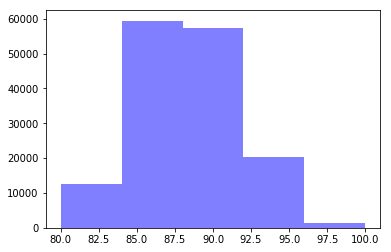

In [11]:
num_bins=5
plt.hist(wine_dataset['points'], 5, facecolor='blue', alpha=0.5)

In [12]:
wine_dataset['country'].value_counts()

US                        62397
Italy                     23478
France                    21098
Spain                      8268
Chile                      5816
Argentina                  5631
Portugal                   5322
Australia                  4957
New Zealand                3320
Austria                    3057
Germany                    2452
South Africa               2258
Greece                      884
Israel                      630
Hungary                     231
Canada                      196
Romania                     139
Slovenia                     94
Uruguay                      92
Croatia                      89
Bulgaria                     77
Moldova                      71
Mexico                       63
Turkey                       52
Georgia                      43
Lebanon                      37
Cyprus                       31
Brazil                       25
Macedonia                    16
Serbia                       14
Morocco                      12
Luxembou

In [15]:
wine_dataset[wine_dataset['country']=='India']

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery
1156,1156,India,"Dark violet-red in color, this wine has a bouq...",Estate Bottled,90,13.0,Nashik,NaN,NaN,Shiraz,Sula
2292,2292,India,"Aromas of blackberry, cherry preserves, white ...",Estate Bottled,91,12.0,Nashik,NaN,NaN,Shiraz,Sula
3145,3145,India,A nose of cut herbs and just-mown grass backed...,NaN,89,12.0,Nashik,NaN,NaN,Sauvignon Blanc,Sula
3174,3174,India,"Aromas of pink grapefruit, grass and coriander...",NaN,90,12.0,Nashik,NaN,NaN,Sauvignon Blanc,Sula
3840,3840,India,"Pineapple, grapefruit, and apricot show bright...",NaN,90,10.0,Nashik,NaN,NaN,Chenin Blanc,Sula
7804,7804,India,This wine features a fresh nose of grapefruit ...,NaN,87,12.0,Nashik,NaN,NaN,Chenin Blanc,Sula
36579,36579,India,Charred wood and smoke dominate the nose and p...,Concerto Collection Basso Reserve,82,20.0,Nashik,NaN,NaN,Cabernet Sauvignon,Good Earth Wine
80529,80529,India,Charred wood and smoke dominate the nose and p...,Concerto Collection Basso Reserve,82,20.0,Nashik,NaN,NaN,Cabernet Sauvignon,Good Earth Wine


In [16]:
wine_dataset['variety'].value_counts()

Chardonnay                       14482
Pinot Noir                       14291
Cabernet Sauvignon               12800
Red Blend                        10062
Bordeaux-style Red Blend          7347
Sauvignon Blanc                   6320
Syrah                             5825
Riesling                          5524
Merlot                            5070
Zinfandel                         3799
Sangiovese                        3345
Malbec                            3208
White Blend                       2824
Rosé                              2817
Tempranillo                       2556
Nebbiolo                          2241
Portuguese Red                    2216
Sparkling Blend                   2004
Shiraz                            1970
Corvina, Rondinella, Molinara     1682
Rhône-style Red Blend             1505
Barbera                           1365
Pinot Gris                        1365
Cabernet Franc                    1363
Sangiovese Grosso                 1346
Pinot Grigio             